In [ ]:
# PARA CALCULAR A REGRESÃO LINEAR UTILIZAR FORMULA y = a.x + b
# SOMATORIA DE x.y e x²
# a = (n.∑xy - ∑x.∑y) / (n.∑x² - (∑x)²)
# b = (1/n) . (∑y - a.∑x) = ym - a.xm
# CALCULAR Y = a.x + b
# encontrar a coluna do dataframe pelo seu indice
# df.iloc[:, 0]
#criar uma nova coluna para indice ao importar o arquivo csv




In [73]:
import pandas as pd

base = pd.read_excel('BaseDados_RegressaoLinear.xlsx')

dados = pd.DataFrame({
        "Apartamento": ['Apto 01', 'Apto 02', 'Apto 03', 'Apto 04', 'Apto 05'],
        'x': [45,50,55,60,65],
        'y': [210950,250250,380670,410200,450900]
        
        })

def calculaxy(tabela):
    tabela['x.y'] = tabela.iloc[:,1] * tabela.iloc[:,2]
    return tabela

def calculax2(tabela):
    tabela['x²'] = tabela.iloc[:,1]**2
    return tabela

def calcula_a(tabela):
    n = len(tabela.iloc[:,0])
    numerador = n * tabela['x.y'].sum() - tabela.iloc[:,1].sum() * tabela.iloc[:,2].sum()
    denominador = n * tabela['x²'].sum() - tabela.iloc[:,1].sum()**2
    a = numerador /denominador
    return a

def calcula_b(tabela):
    b = tabela.iloc[:,2].mean()-calcula_a(tabela)*tabela.iloc[:,1].mean()
    return b

def calcula_y(tabela):
    tabela['y_calculado'] = calcula_a(tabela)*tabela.iloc[:,1] + calcula_b(tabela)
    return tabela

def calcual_previsao(tabela, x):
    y = calcula_a(tabela)*x + calcula_b(tabela)
    return y
    


In [69]:
base.iloc[:,2] 

0     2900.124323
1     2929.125566
2     2958.416822
3     2988.000990
4     3017.881000
         ...     
94    7279.937858
95    7315.799621
96    7351.661384
97    7387.523147
98    7423.384910
Name: Limite_Emprestimo, Length: 99, dtype: float64

In [70]:
xy = calculaxy(base)
nova_tabela = calculax2(xy)

In [71]:
print(nova_tabela)


      INDICE      Salario  Limite_Emprestimo           x.y            x²
0   0.909144  1250.219130        2900.124323  3.625791e+06  1.563048e+06
1   0.536008  1262.721321        2929.125566  3.698669e+06  1.594465e+06
2   0.260186  1275.348535        2958.416822  3.773013e+06  1.626514e+06
3   0.486808  1288.102020        2988.000990  3.848850e+06  1.659207e+06
4   0.551902  1300.983040        3017.881000  3.926212e+06  1.692557e+06
..       ...          ...                ...           ...           ...
94  0.862964  3185.629581        7279.937858  2.319119e+07  1.014824e+07
95  0.014223  3217.485877        7315.799621  2.353848e+07  1.035222e+07
96  0.603589  3249.660736        7351.661384  2.389041e+07  1.056029e+07
97  0.407157  3282.157343        7387.523147  2.424701e+07  1.077256e+07
98  0.777109  3314.978916        7423.384910  2.460836e+07  1.098909e+07

[99 rows x 5 columns]


In [74]:
calcula_a(nova_tabela)

2.292520233866347

In [75]:
calcula_b(nova_tabela)

42.57109912743363

In [76]:
predicao = calcula_y(nova_tabela)

predicao

,INDICE,Salario,Limite_Emprestimo,x.y,x²,y_calculado
0,0.909144,1250.219130,2900.124323,3.625791e+06,1.563048e+06,2908.723751
1,0.536008,1262.721321,2929.125566,3.698669e+06,1.594465e+06,2937.385278
2,0.260186,1275.348535,2958.416822,3.773013e+06,1.626514e+06,2966.333420
3,0.486808,1288.102020,2988.000990,3.848850e+06,1.659207e+06,2995.571043
4,0.551902,1300.983040,3017.881000,3.926212e+06,1.692557e+06,3025.101042
...,...,...,...,...,...,...
94,0.862964,3185.629581,7279.937858,2.319119e+07,1.014824e+07,7345.691371
95,0.014223,3217.485877,7315.799621,2.353848e+07,1.035222e+07,7418.722574
96,0.603589,3249.660736,7351.661384,2.389041e+07,1.056029e+07,7492.484089
97,0.407157,3282.157343,7387.523147,2.424701e+07,1.077256e+07,7566.983219


<AxesSubplot:xlabel='Salario'>

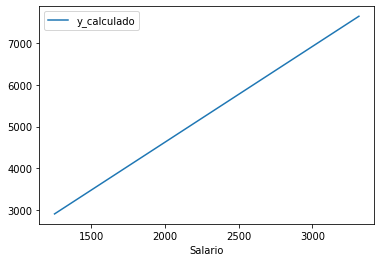

In [80]:
predicao.plot(x='Salario', y='y_calculado')

In [81]:
calcual_previsao(nova_tabela, 5000.00)

11505.172268459168